<a href="https://colab.research.google.com/github/govldbstj/DeepLearning_from_Scratch_1/blob/main/01_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

##**신경망**
다층 퍼셉트론에서 가중치 매개변수를 적절하게 변경해주어야 학습을 할 수 있다.</br>이 과정을 데이터로부터 자동으로 학습하는 능력을 가지는 것이 신경망이다.</br>n층 신경망이라고 하면 가중치를 갖는 층이 n개이다.</br>일반적으로 입력층-은닉층-출력층 의 형태로 이루어져있다.
</br></br>퍼셉트론과 신경망의 주된 차이는 활성화 함수이다!</br>퍼셉트론은 계단 함수를 활성화 함수로 사용하는 신경망이다.

###활성화 함수
sigmoid</br>
계단 함수</br>
ReLU</br>
(책에서는 계단-시그모이드-렐루 순으로 설명이 되어 있습니다)

**(1) 시그모이드 함수</br>**
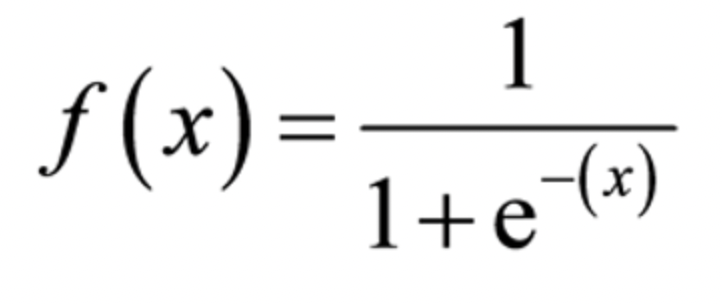

In [81]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [82]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

In [83]:
t = np.array([1.0, 2.0, 3.0])
1.0+t
1.0/t

array([1.        , 0.5       , 0.33333333])

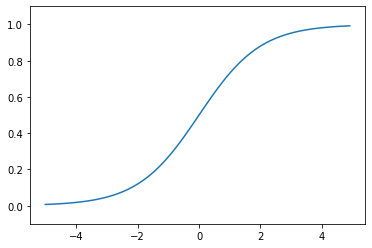

In [84]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

**(2) 계단 함수</br>**


In [85]:
def step_function(x):
  if x>0:
    return 1
  else:
    return 0

In [86]:
def step_function(x):
  y = x>0
  return y.astype(np.int)

In [87]:
x = np.array([-1.0, 1.0, 2.0])
print(x)
y = x > 0
print(y)

[-1.  1.  2.]
[False  True  True]


In [88]:
y = y.astype(np.int)
y

<ipython-input-88-9f962d9dbdc0>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.int)


array([0, 1, 1])

<ipython-input-86-00ca41bd1652>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return y.astype(np.int)


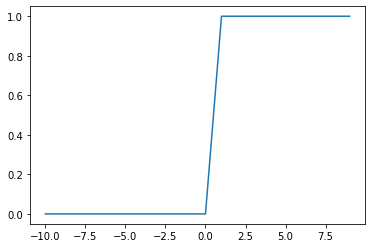

In [89]:
x = np.arange(-10, 10, 1)
y = step_function(x)
plt.plot(x,y)
plt.show()

시그모이드는 계단함수보다 더 매끈하고 연속적인 실수가 흐른다.</br>
반면 계단함수는 0또는 1의 값을 가진다.</br>
두 활성화함수 모두 비선형 함수이다.

**(3) ReLU**
</br>Rectified Linear Unit </br>
입력이 0을 넘으면 입력 그대로 출력하고, 0 이하이면 0을 출력한다.

In [90]:
def relu(x):
  return np.maximum(0, x)

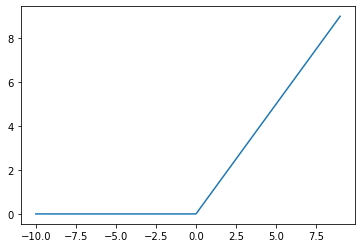

In [91]:
x = np.arange(-10, 10, 1)
y = relu(x)
plt.plot(x,y)
plt.show()

##**다차원 배열의 계산**


In [92]:
A = np.array([1,2,3,4])
print(A)
np.ndim(A) # np.ndim : 차원의 수 확인
print(A.shape)
print(A.shape[0])

[1 2 3 4]
(4,)
4


In [93]:
B = np.array([[1,2], [3,4], [5,6]])
print(B)
print(np.ndim(B))
print(B.shape)

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


###행렬 내적</br>
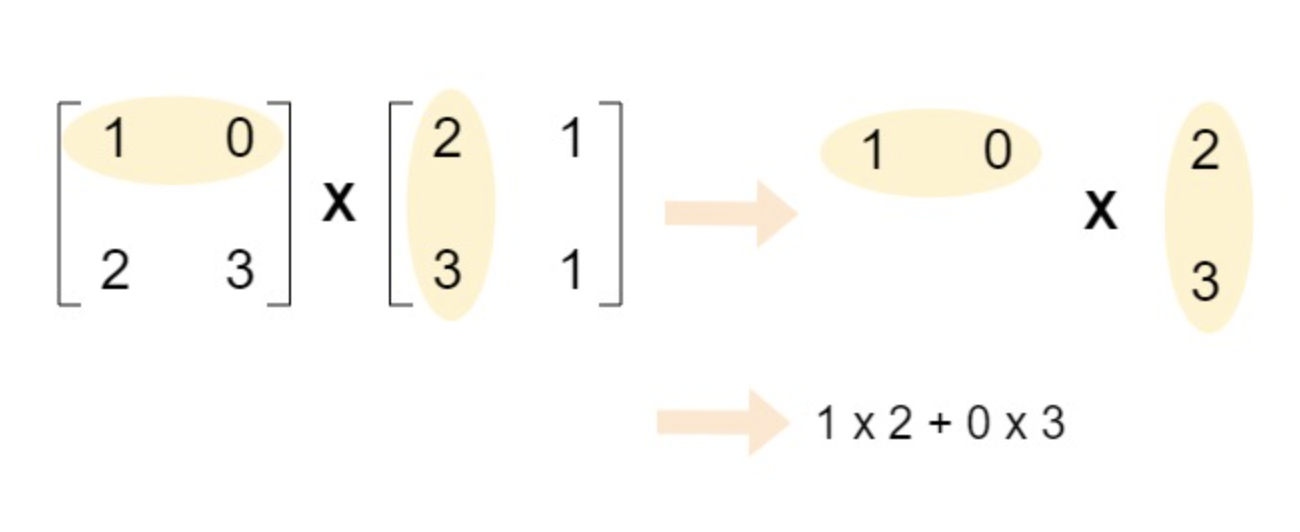

In [94]:
A = np.array([[1,2],[3,4]])
A.shape
B = np.array([[5,6],[7,8]])
B.shape
np.dot(A,B)

array([[19, 22],
       [43, 50]])

In [95]:
A = np.array([[1,2,3],[4,5,6]])
A.shape
B = np.array([[1,2],[3,4],[5,6]])
B.shape
np.dot(A,B)

array([[22, 28],
       [49, 64]])

In [96]:
C = np.array([[1,2], [3,4]])
print(C.shape) #2*2
print(A.shape) #2*3
# np.dot(A,C) #2*3 2*2 불가능 
np.dot(C,A)

(2, 2)
(2, 3)


array([[ 9, 12, 15],
       [19, 26, 33]])

In [97]:
A = np.array([[1,2],[3,4],[5,6]])
A.shape
B = np.array([7,8])
B.shape
np.dot(A,B)

array([23, 53, 83])

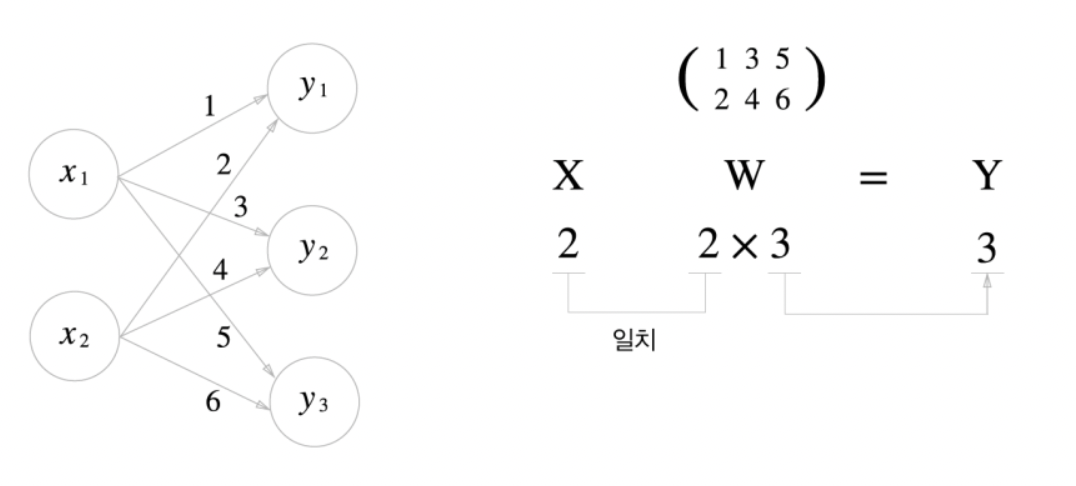

In [98]:
X = np.array([1,2]) # 입력 신호 x1, x2
print("X")
print(X.shape)
print(X)

W = np.array([[1,3,5],[2,4,6]]) # 입력 신호 1에 대한 가중치 w1, 입력 신호 2에 대한 가중치 w2
print("W")
print(W.shape)
print(W)

Y = np.dot(X, W) # 가중합, 출력
print("X dot W")
print(Y.shape)
print(Y)

X
(2,)
[1 2]
W
(2, 3)
[[1 3 5]
 [2 4 6]]
X dot W
(3,)
[ 5 11 17]


### 3층 신경망 구현하기
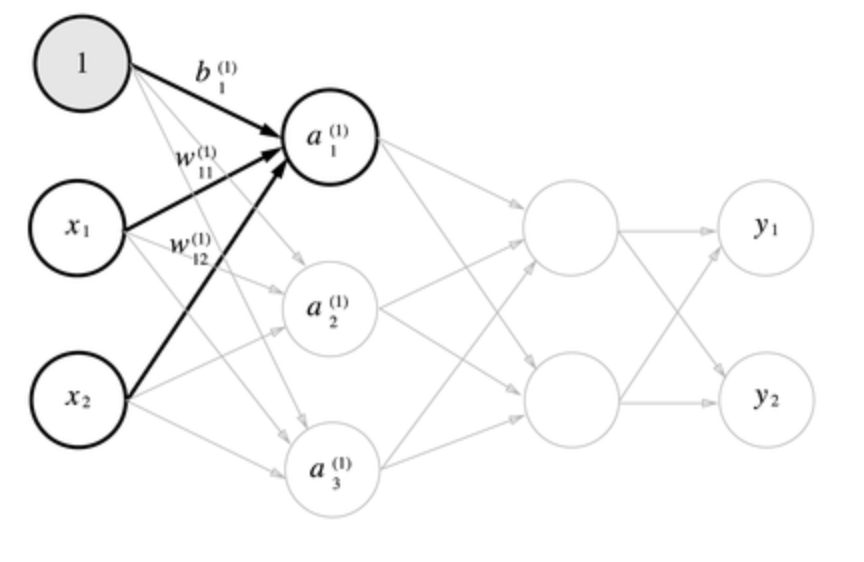

In [99]:
#1. 입력층(입력 신호 2개, 편향 1개)에서 1층으로 신호 전달하기
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1)

(2, 3)
(2,)
(3,)


In [100]:
#2. 1층에서 받은 신호의 가중합 -> 활성화
Z1 = sigmoid(A1)
print(A1) #활성화 함수 전
print(Z1) #활성화 함수 후

[0.2 0.5 0.8]
[0.549834   0.62245933 0.68997448]


In [101]:
#3. 1층에서 2층으로 신호 전달
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]]) #1층의 3개 노드에 대한 가중치 W1, W2, W3
B2 = np.array([0.1, 0.2]) # 1->2층으로 가는 데 적용할 편향 B2

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

(3,)
(3, 2)
(2,)


In [102]:
#4. 2층에서 출력층으로 신호 전달
#위와 다른 부분: 항등함수를 활성화함수로 사용. 즉, 어떠한 가공 없이 있는 그대로 출력

def identity_function(x):
  return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3)+B3
Y = identity_function(A3)

In [103]:
#forward propagation 순전파

def init_network():
  network = {}
  network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
  network['b1'] = np.array([0.1, 0.2, 0.3])
  network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
  network['b2'] = np.array([0.1, 0.2])
  network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
  network['b3'] = np.array([0.1, 0.2])

  return network

def forward(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1)+b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2)+b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3)+b3
  y = identity_function(a3)

  return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


요약 정리</br>
1. 신경망의 구성 요소
</br>입력 신호, 가중치, 편향, 활성화함수
2. 퍼셉트론과의 차이점
</br>계단 함수 이외의 활성화 함수를 이용한다.
</br>XOR 문제와 같은 복잡한 문제를 해결하기 위해서 여러 층 쌓는다.
3. 분류와 회귀 문제의 차이점
</br>신경망을 사용할 때 마지막 출력층에서 활성화함수를 어떤 걸 쓰냐에 따라 다르다.</br>
분류 : 소프트맥스 함수</br>
회귀 : 항등 함수</br>
4. 순전파의 흐름</br>
입력 신호 -> 가중치와 편향 적용 -> 다음 층의 입력신호로 들어옴 -> 활성화함수 -> 다시 가중치와 편향 적용 -> 그 다음 층의 입력신호로 들어옴 -> 활성화함수...

##**항등 함수와 소프트맥스 함수**
항등 함수 : 입력을 그대로 출력 (회귀)</br>
소프트맥스 함수 : 확률값으로 나타내주는 함수 (분류)</br>

###소프트맥스 함수 softmax function
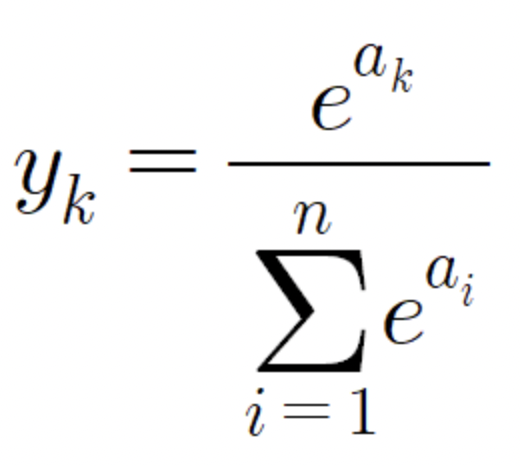
</br>지수함수 값/지수함수의 합, n: 출력층의 뉴런 수, k: k번째 출력

In [104]:
# softmax 함수 구현
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a)
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a/sum_exp_a
print(y) #0~1사이의 값, 합치면 1이 된다

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


소프트맥스 함수는 지수함수를 기반으로 하므로 오버플로의 문제가 발생할 가능성이 있다. </br>
따라서 입력 신호 중 최댓값을 빼는 방식으로 변형해 사용한다.

In [105]:
def softmax(a):
  c = np.max(a) # 이 부분!
  exp_a = np.exp(a-c)
  sum_exp_a = np.sum(exp_a)
  y = exp_a/sum_exp_a

  return y

In [106]:
# 소프트맥스 함수의 특징
# 출력이 0~1사이의 값 (확률값)
# 합이 1
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
np.sum(y)

[0.01821127 0.24519181 0.73659691]


1.0

기계학습은 학습과 추론 과정으로 나뉜다.</br>
학습 진행 중일 때에는 파라미터에 변화가 있어 소프트맥스함수를 적용해주지만, 추론 과정에서는 변화가 없으므로 생략해도 된다.</br>
지수함수를 기반으로 만들어진 소프트맥스 함수는 단조증가함수이기 때문이다.</br>
소프트맥스 함수는 학습 시에만 사용하자.

###출력층의 뉴런 수 정하기
각 숫자에 대응한다.</br>
0~9까지의 숫자로 분류해야 한다면 10가지이므로 출력층 뉴런 수는 10.

##**MNIST 손글씨 숫자 인식**
학습과정은 생략하고, 추론과정만 구현해 볼 것이다.</br>
이미 학습된 매개변수를 사용해서 순전파를 구현해보자.</br>
MNIST 데이터 셋 : 0~9까지의 숫자, 28*28 회색조 이미지</br>

In [107]:
from mnist import load_mnist

In [108]:
#mnist 데이터셋 로드하기

#인수로 flatten, normalize, one_hot_label 사용 가능
#flattem true : n차원 -> 1차원
#normalize true : 이미지 픽셀(0~255) -> 0.0~1.0 (정규화!)
#one_hot_label true : 원핫인코딩 진행 (정답만 1, 나머지 0인 배열 형태로 변경)

(x_train, t_train), (x_test, t_test) = load_mnist(flatten = True, normalize = False) 


In [109]:
#훈련이미지, 훈련레이블
print(x_train.shape)
print(t_train.shape)
#시험이미지, 시험레이블
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [110]:
#이미지 출력하기
from PIL import Image

def img_show(img):
  pil_img = Image.fromarray(np.uint8(img))
  pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten = True, normalize = False)

img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

print(img)

5
(784,)
(28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 

MNIST 데이터셋으로 추론 신경망 만들기</br>
입력층 784 (이미지 크기 28x28)</br>
출력층 10 (0~9까지의 숫자)</br>


In [111]:
#1. 데이터셋 로드
def get_data():
  (x_train, t_train), (x_test, t_test) = \
  load_mnist(normalize = True, flatten = True, one_hot_label = False)
  return x_test, t_test

In [112]:
#2. 신경망 초기화 -> pickle 파일 안에 있는 가중치 매개변수 값으로 세팅
def init_network():
  with open("sample_weight.pkl", 'rb') as f:
    network = pickle.load(f)
  return network

In [126]:
#3. 2에서 세팅한 매개변수를 토대로 예측 ((내적+편향 -> 시그모이드 반복), 출력에서는 소프트맥스)
def predict(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = softmax(a3)

  return y

In [127]:
#4. 정확도
x, t = get_data()
network = init_network()

accuracy_cnt = 0

for i in range(len(x)): #이미지데이터 1장씩 검사
  y = predict(network, x[i]) #예측모델에 통과, 확률값으로 리턴 (0부터 9까지 총 10개의 확률값을 가진 리스트 반환)
  p = np.argmax(y) #리스트 중 가장 확률이 높은 것의 인덱스를 뽑아냄
  if p == t[i]: #정답데이터와 비교
    accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt)/len(x)))

Accuracy:0.9352


###**배치 처리**
위에서 만든 간단한 예측 모델은 input layer 784, hidden layer 2개층, output layer 10 로 이루어져 있다.</br>
형상을 잘 살펴보자. </br>(입력 : 10000x784, 입력->1st: 784x50, 1st->2nd:50x100, 2nd->출력 : 100x10)

In [121]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

print("input layer", x.shape) #이미지 개수 10000, 이미지당 픽셀 수 784(28*28)
print("input feature", x[0].shape)
print("input->hidden 1st", W1.shape)
print("hidden 1st->hidden 2nd", W2.shape)
print("hidden 2nd->output", W3.shape)

input layer (10000, 784)
input feature (784,)
input->hidden 1st (784, 50)
hidden 1st->hidden 2nd (50, 100)
hidden 2nd->output (100, 10)


배치: 하나로 묶은 입력 데이터.</br>수치 라이브러리는 큰 배열을 효율적으로 처리할 수 있도록 설계되어있음.</br>데이터 전송 자체에 대한 부하를 줄일 수 있음.

In [133]:
#배치 처리 코드
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0
cnt = 0
for i in range(0, len(x), batch_size):
  cnt += 1
  x_batch = x[i:i+batch_size]
  y_batch = predict(network, x_batch)
  p = np.argmax(y_batch, axis = 1)
  accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("cnt is: " , cnt)
print("total data size is: ", len(x))
print("batch size is: ", batch_size)
print("Accuracy:" + str(float(accuracy_cnt)/len(x)))

cnt is:  100
total data size is:  10000
batch size is:  100
Accuracy:0.9352
